In [1]:
import pandas as pd, os
from stat_tests import *
from charts import *

pd.options.display.max_columns = None

In [2]:
# import
results = pd.read_csv(os.path.join('..', 'data', 'results.csv'), index_col=0)
respondents = pd.read_csv(os.path.join('..', 'data', 'respondents.csv'), index_col=0)

# Statistical tests

## Correlations

<Axes: >

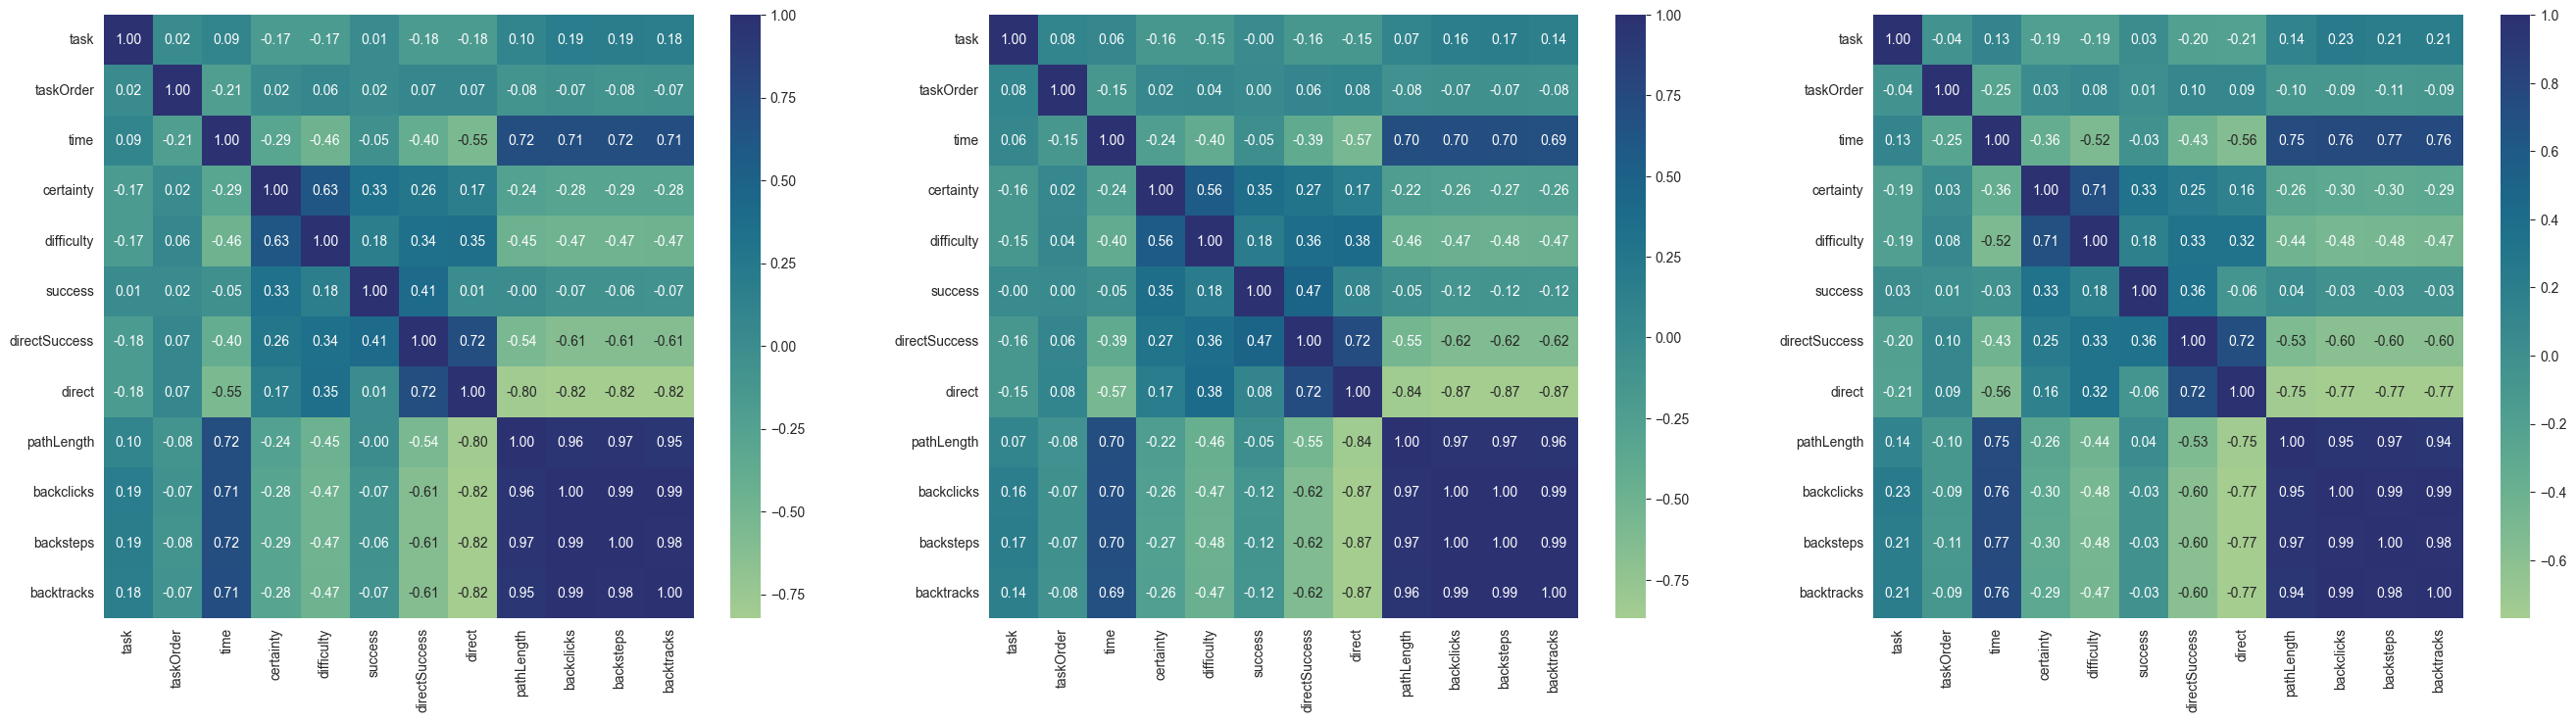

In [3]:
_, [ax1, ax2, ax3] = plt.subplots(ncols=3, nrows=1, figsize=(33, 8))
sns.heatmap(results[['task', 'taskOrder', 'time',
        'certainty', 'difficulty', 'success',
       'directSuccess', 'direct', 'pathLength',
       'backclicks', 'backsteps', 'backtracks']].corr(method='spearman'), annot=True, fmt=".2f", cmap="crest", ax=ax1)
sns.heatmap(results[results.variant.isin(['TP', 'TC', 'TO'])][['task', 'taskOrder', 'time',
        'certainty', 'difficulty', 'success',
       'directSuccess', 'direct', 'pathLength',
       'backclicks', 'backsteps', 'backtracks']].corr(method='spearman'), annot=True, fmt=".2f", cmap="crest", ax=ax2)
sns.heatmap(results[results.variant.isin(['WTC', 'WTCI', 'WM'])][['task', 'taskOrder', 'time',
        'certainty', 'difficulty', 'success',
       'directSuccess', 'direct', 'pathLength',
       'backclicks', 'backsteps', 'backtracks']].corr(method='spearman'), annot=True, fmt=".2f", cmap="crest", ax=ax3)

## All variants between each other

### Correlations

In [4]:
for comb in [
    ('backsteps', 'backtracks'),
    ('backclicks', 'backtracks'),
    ('backclicks', 'backsteps'),
    ('backtracks', 'time'),
    ('backsteps', 'time'),
    ('backtracks', 'pathLength'),
    ('backsteps', 'pathLength'),
    ('backtracks', 'certainty'),
    ('backtracks', 'difficulty'),
    ('certainty', 'difficulty'),
    ('time', 'direct'),
    ('time', 'directSuccess'),
    ('direct', 'backtracks'),
    ('directSuccess', 'backtracks'),
    ('pathLength', 'direct'),
    ('pathLength', 'directSuccess'),
    ('certainty', 'success'),
    ('certainty', 'directSuccess'),
    ('certainty', 'time'),
    ('difficulty', 'direct'),
    ('difficulty', 'time'),
    ('difficulty', 'backtracks'),
]:
    stat, p = stats.spearmanr(results[comb[0]], results[comb[1]])
    if(np.abs(stat) > 0.1):
        print(comb[0] + ' and ' + comb[1] + ' ---> ', end='')
        print('stat = {s}, p = {p}'.format(s=stat, p=p))

backsteps and backtracks ---> stat = 0.9840277584519947, p = 0.0
backclicks and backtracks ---> stat = 0.9911700727187569, p = 0.0
backclicks and backsteps ---> stat = 0.9909594744804044, p = 0.0
backtracks and time ---> stat = 0.7066933860457083, p = 1.7995358479197015e-272
backsteps and time ---> stat = 0.7172847235094413, p = 2.0174313599141815e-284
backtracks and pathLength ---> stat = 0.9472966382107874, p = 0.0
backsteps and pathLength ---> stat = 0.9662950134961346, p = 0.0
backtracks and certainty ---> stat = -0.27822708558955844, p = 2.3441433584038843e-33
backtracks and difficulty ---> stat = -0.4654951620703856, p = 1.7955286631223528e-97
certainty and difficulty ---> stat = 0.6273566982353947, p = 1.5570078295505035e-197
time and direct ---> stat = -0.5508259322900854, p = 2.34367370739776e-143
time and directSuccess ---> stat = -0.4023969524260914, p = 5.019876583231473e-71
direct and backtracks ---> stat = -0.8225299728819823, p = 0.0
directSuccess and backtracks ---> sta

### Chi2/ANOVA/Kruskal

In [5]:
# success
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,True,0.0021,18.7866,0.1980,5,1800,0.400893,0.407150,0.075670,0.075670,0.846365,0.091167,0.005503,0.005503,0.294996,0.294996,0.294996,0.527918,0.910000,0.091167,0.091167
1,directSuccess,True,0.0467,11.2477,0.1186,5,1800,0.862028,0.226948,0.862028,1.000000,0.737243,0.416688,0.737243,0.862028,0.484503,0.128668,0.226948,0.055532,0.862028,0.862028,0.737243
2,direct,True,0.0323,12.1891,0.1285,5,1800,0.397756,0.164511,0.857664,0.869595,1.000000,0.857664,0.164511,0.189700,0.389542,0.108933,0.108933,0.164511,1.000000,0.857664,0.880360


In [6]:
# path length, backsteps, backtracks and time
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,True,0.0104,14.9862,0.0056,5,1800,0.6453,0.9787,0.9341,0.4363,0.0079,0.6263,0.5871,0.7504,0.0018,0.9553,0.4208,0.0085,0.3892,0.0101,< .001
1,backclicks,True,0.0027,18.2058,0.0074,5,1800,0.0142,0.1155,0.3647,0.9261,0.4313,0.3799,< .001,0.0109,0.0012,0.0131,0.0956,0.0182,0.4158,0.9049,0.4876
2,backsteps,True,0.0012,20.0156,0.0084,5,1800,0.0528,0.1168,0.1867,0.7539,0.1582,0.7128,0.0011,0.0244,< .001,0.0039,0.0599,0.0029,0.3139,0.9278,0.2724
3,backtracks,True,< .001,21.2764,0.0091,5,1800,0.0155,0.0487,0.2348,0.7183,0.6117,0.653,< .001,0.0054,0.0034,0.0016,0.0197,0.0132,0.4081,0.4963,0.8832
4,time,True,< .001,27.2957,0.0124,5,1800,0.0994,0.0472,0.0533,0.3475,0.1144,0.7365,< .001,0.0097,0.0013,< .001,0.0035,< .001,0.3207,0.7234,0.5227
5,certainty,True,0.0051,16.7227,0.0065,5,1800,0.1599,0.1485,0.4568,0.2915,0.0501,0.9686,0.5085,0.7259,< .001,0.4836,0.6966,< .001,0.7561,0.0069,0.0026
6,difficulty,False,0.116,8.8304,0.0021,5,1800,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
my_kruskal(results[results.task.isin([4, 8, 9, 5, 6, 11])], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,True,0.0021,18.8348,0.0129,5,1080,0.801,0.613,0.3646,0.0633,0.0277,0.4486,0.5127,0.1085,0.0142,0.1578,0.0182,0.09,0.342,0.0019,< .001
1,backclicks,False,0.0908,9.4971,0.0042,5,1080,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.0944,9.3929,0.0041,5,1080,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.0626,10.4833,0.0051,5,1080,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,True,0.0068,16.0076,0.0102,5,1080,0.2081,0.0246,0.3214,0.697,0.4579,0.3227,0.0244,0.0993,0.0454,0.0012,0.0084,0.0028,0.547,0.8032,0.7241
5,certainty,True,0.0068,16.0281,0.0103,5,1080,0.1012,0.0435,0.7022,0.553,0.125,0.7038,0.2089,0.2957,0.0015,0.1017,0.1539,< .001,0.833,0.0553,0.0334
6,difficulty,False,0.2636,6.4647,0.0014,5,1080,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
my_anova(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,p,F,significant,n,d,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,< .001,5.1493,True,1800,5,0.762,0.991,0.977,0.282,0.145,0.373,0.991,0.973,0.002,0.758,0.072,0.448,0.746,0.019,< .001
1,backclicks,< .001,4.4629,True,1800,5,0.023,0.845,0.763,1.0,1.0,0.387,< .001,0.047,0.029,0.118,0.933,0.874,0.618,0.724,1.0
2,backsteps,< .001,4.5614,True,1800,5,0.119,0.799,0.468,1.0,0.981,0.816,< .001,0.132,0.016,0.026,0.821,0.351,0.441,0.887,0.975
3,backtracks,< .001,5.7463,True,1800,5,0.046,0.61,0.318,0.998,0.999,0.787,< .001,0.012,0.112,0.004,0.339,0.814,0.585,0.163,0.974
4,time,< .001,4.8343,True,1800,5,0.99,0.341,0.545,0.747,0.343,0.732,0.198,0.356,0.095,0.003,0.01,< .001,1.0,1.0,0.989
5,certainty,0.1145,1.7764,False,1800,5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,0.1342,1.6881,False,1800,5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [9]:
# interactivity
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,interactivity,False,0.0724,10.1031,0.0293,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,time,True,0.014,14.2660,0.0533,5,180,0.3192,0.7296,0.0022,0.0142,0.2172,0.5154,0.0383,0.1455,0.812,0.0065,0.0352,0.3744,0.5381,0.0667,0.2233


In [10]:
my_anova(respondents, ['interactivity', 'time'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,p,F,significant,n,d,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,interactivity,0.0186,2.7970,True,180,5,0.029,1.0,0.994,0.986,0.711,0.021,0.123,0.158,0.57,0.986,0.973,0.642,1.0,0.951,0.973
1,time,0.392,1.0466,False,180,5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## Tree test variants

### Correlations

In [11]:
for comb in [
    ('backsteps', 'backtracks'),
    ('backclicks', 'backtracks'),
    ('backclicks', 'backsteps'),
    ('backtracks', 'time'),
    ('backsteps', 'time'),
    ('backtracks', 'pathLength'),
    ('backsteps', 'pathLength'),
    ('backtracks', 'certainty'),
    ('backtracks', 'difficulty'),
    ('certainty', 'difficulty'),
    ('time', 'direct'),
    ('time', 'directSuccess'),
    ('direct', 'backtracks'),
    ('directSuccess', 'backtracks'),
    ('pathLength', 'direct'),
    ('pathLength', 'directSuccess'),
    ('certainty', 'success'),
    ('certainty', 'directSuccess'),
    ('certainty', 'time'),
    ('difficulty', 'direct'),
    ('difficulty', 'time'),
    ('difficulty', 'backtracks'),
]:
    stat, p = stats.spearmanr(results[results.variant.isin(['TP', 'TC', 'TO'])][comb[0]], results[results.variant.isin(['TP', 'TC', 'TO'])][comb[1]])
    if(np.abs(stat) > 0.1):
        print(comb[0] + ' and ' + comb[1] + ' ---> ', end='')
        print('stat = {s}, p = {p}'.format(s=stat, p=p))

backsteps and backtracks ---> stat = 0.986751062564817, p = 0.0
backclicks and backtracks ---> stat = 0.9903784862211169, p = 0.0
backclicks and backsteps ---> stat = 0.9959434501706121, p = 0.0
backtracks and time ---> stat = 0.6910535415618606, p = 9.668589596650729e-129
backsteps and time ---> stat = 0.7033513237172732, p = 2.950949190635689e-135
backtracks and pathLength ---> stat = 0.9566588401513785, p = 0.0
backsteps and pathLength ---> stat = 0.970431628828226, p = 0.0
backtracks and certainty ---> stat = -0.26212203151503755, p = 1.3180477165953497e-15
backtracks and difficulty ---> stat = -0.47106965253632277, p = 6.66289607016556e-51
certainty and difficulty ---> stat = 0.5582030177702663, p = 7.422259151521786e-75
time and direct ---> stat = -0.5693423351869636, p = 1.868097626717637e-78
time and directSuccess ---> stat = -0.3932376927483907, p = 1.1765140263270906e-34
direct and backtracks ---> stat = -0.8696738837197767, p = 1.4376850088210576e-277
directSuccess and backt

### Chi/ANOVA/Kruskal

In [12]:
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TC__TO
0,success,False,0.1168,4.2946,0.1012,2,900,NaN,NaN,NaN
1,directSuccess,False,0.1016,4.5734,0.1078,2,900,NaN,NaN,NaN
2,direct,False,0.1203,4.2353,0.0998,2,900,NaN,NaN,NaN


In [13]:
# tasks with at least two backsteps
my_chi(results[results.task.isin([4, 8, 9, 5, 6, 11])], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TC__TO
0,success,True,0.0379,6.5444,0.1991,2,540,0.203405,0.203405,0.029991
1,directSuccess,False,0.0945,4.7193,0.1436,2,540,NaN,NaN,NaN
2,direct,False,0.3936,1.8650,0.0567,2,540,NaN,NaN,NaN


In [14]:
# path length, backsteps, backtracks and time
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TC__TO
0,pathLength,False,0.8432,0.3411,-0.0018,2,900,None,None,None
1,backclicks,True,0.0483,6.0604,0.0045,2,900,0.0156,0.1079,0.4174
2,backsteps,False,0.1196,4.2480,0.0025,2,900,None,None,None
3,backtracks,True,0.0367,6.6106,0.0051,2,900,0.0165,0.0452,0.6927
4,time,False,0.1071,4.4674,0.0028,2,900,None,None,None
5,certainty,False,0.2692,2.6248,0.0007,2,900,None,None,None
6,difficulty,False,0.6993,0.7155,-0.0014,2,900,None,None,None


In [15]:
my_kruskal(results[results.task.isin([4, 8, 9, 5, 6, 11])], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TC__TO
0,pathLength,False,0.7206,0.6554,-0.0025,2,540,None,None,None
1,backclicks,False,0.1138,4.3463,0.0044,2,540,None,None,None
2,backsteps,False,0.252,2.7566,0.0014,2,540,None,None,None
3,backtracks,False,0.12,4.2401,0.0042,2,540,None,None,None
4,time,False,0.0786,5.0860,0.0057,2,540,None,None,None
5,certainty,False,0.1175,4.2830,0.0043,2,540,None,None,None
6,difficulty,False,0.9168,0.1738,-0.0034,2,540,None,None,None


In [16]:
my_anova(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO'])

,feature,p,F,significant,n,d,TP__TC,TP__TO,TC__TO
0,pathLength,0.1521,1.8871,False,900,2,None,None,None
1,backclicks,0.0024,6.0605,True,900,2,0.002,0.388,0.083
2,backsteps,0.0192,3.9683,True,900,2,0.014,0.328,0.346
3,backtracks,0.0039,5.5707,True,900,2,0.003,0.16,0.291
4,time,0.1671,1.7925,False,900,2,None,None,None
5,certainty,0.2721,1.3034,False,900,2,None,None,None
6,difficulty,0.9491,0.0523,False,900,2,None,None,None


In [17]:
# interactivity
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TP', 'TC', 'TO'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TC__TO
0,interactivity,False,0.1173,4.2864,0.0263,2,90,None,None,None
1,time,False,0.5866,1.0669,-0.0107,2,90,None,None,None


In [18]:
my_anova(respondents, ['interactivity', 'time'], 'variant', ['TP', 'TC', 'TO'])

,feature,p,F,significant,n,d,TP__TC,TP__TO,TC__TO
0,interactivity,0.0144,4.4569,True,90,2,0.034,0.995,0.027
1,time,0.3988,0.9292,False,90,2,None,None,None


## Web test variants

### Correlations

In [19]:
for comb in [
    ('backsteps', 'backtracks'),
    ('backtracks', 'time'),
    ('backsteps', 'time'),
    ('backtracks', 'pathLength'),
    ('backsteps', 'pathLength'),
    ('backtracks', 'certainty'),
    ('backtracks', 'difficulty'),
    ('certainty', 'difficulty'),
    ('time', 'direct'),
    ('time', 'directSuccess'),
    ('direct', 'backtracks'),
    ('directSuccess', 'backtracks'),
    ('pathLength', 'direct'),
    ('pathLength', 'directSuccess'),
    ('certainty', 'success'),
    ('certainty', 'directSuccess'),
    ('certainty', 'time'),
    ('difficulty', 'direct'),
    ('difficulty', 'time'),
    ('difficulty', 'backtracks'),
]:
    stat, p = stats.spearmanr(results[results.variant.isin(['WTC', 'WTCI', 'WM'])][comb[0]], results[results.variant.isin(['WTC', 'WTCI', 'WM'])][comb[1]])
    if(np.abs(stat) > 0.1):
        print(comb[0] + ' and ' + comb[1] + ' ---> ', end='')
        print('stat = {s}, p = {p}'.format(s=stat, p=p))

backsteps and backtracks ---> stat = 0.9808818063125326, p = 0.0
backtracks and time ---> stat = 0.7557119703691408, p = 2.9789493809326292e-167
backsteps and time ---> stat = 0.7657101464395462, p = 2.672427815820585e-174
backtracks and pathLength ---> stat = 0.9409440362247429, p = 0.0
backsteps and pathLength ---> stat = 0.9664212753898698, p = 0.0
backtracks and certainty ---> stat = -0.28863512620815446, p = 9.943162275307307e-19
backtracks and difficulty ---> stat = -0.47211833542701975, p = 3.755511932235318e-51
certainty and difficulty ---> stat = 0.7085758371370195, p = 3.972607074858045e-138
time and direct ---> stat = -0.5585377967478646, p = 5.812315305279418e-75
time and directSuccess ---> stat = -0.4341608976773604, p = 1.1404105801639537e-42
direct and backtracks ---> stat = -0.7706059252675319, p = 7.017205486082754e-178
directSuccess and backtracks ---> stat = -0.6018905750526152, p = 8.434711724051979e-90
pathLength and direct ---> stat = -0.7493310998616559, p = 6.24

### Chi2/ANOVA/Kruskal

In [20]:
# success
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,WTC__WTCI,WTC__WM,WTCI__WM
0,success,True,0.0468,6.1231,0.1443,2,900,1.0,0.065254,0.065254
1,directSuccess,False,0.6463,0.8730,0.0206,2,900,NaN,NaN,NaN
2,direct,False,0.8185,0.4005,0.0094,2,900,NaN,NaN,NaN


In [21]:
# path length, backsteps, backtracks and time
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,True,0.001,13.7924,0.0131,2,900,0.3605,0.0078,< .001
1,backclicks,False,0.6687,0.8048,-0.0013,2,900,None,None,None
2,backsteps,False,0.4667,1.5243,-0.0005,2,900,None,None,None
3,backtracks,False,0.6756,0.7842,-0.0014,2,900,None,None,None
4,time,False,0.6061,1.0013,-0.0011,2,900,None,None,None
5,certainty,True,0.0033,11.4406,0.0105,2,900,0.7461,0.0059,0.0021
6,difficulty,False,0.0622,5.5557,0.004,2,900,None,None,None


In [22]:
my_anova(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['WTC', 'WTCI', 'WM'])

,feature,p,F,significant,n,d,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,< .001,11.4835,True,900,2,0.338,0.003,< .001
1,backclicks,0.2855,1.2554,False,900,2,None,None,None
2,backsteps,0.2417,1.4223,False,900,2,None,None,None
3,backtracks,0.095,2.3602,False,900,2,None,None,None
4,time,0.7844,0.2429,False,900,2,None,None,None
5,certainty,0.0624,2.7835,False,900,2,None,None,None
6,difficulty,0.3331,1.1008,False,900,2,None,None,None


In [23]:
# interactivity
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,WTC__WTCI,WTC__WM,WTCI__WM
0,interactivity,False,0.3053,2.3732,0.0043,2,90,None,None,None
1,time,False,0.1092,4.4286,0.0279,2,90,None,None,None


In [24]:
my_anova(respondents, ['interactivity', 'time'], 'variant', ['WTC', 'WTCI', 'WM'])

,feature,p,F,significant,n,d,WTC__WTCI,WTC__WM,WTCI__WM
0,interactivity,0.431,0.8499,False,90,2,None,None,None
1,time,0.801,0.2225,False,90,2,None,None,None


## Tree test vs. WTC

In [25]:
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'WTC'])

,Property,Significant,p,Chi2,v,d,n,TP__WTC
0,success,True,0.0222,5.2321,0.2136,1,600,0.023283
1,directSuccess,False,0.684,0.1656,0.0068,1,600,NaN
2,direct,False,0.5401,0.3753,0.0153,1,600,NaN


In [26]:
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'WTC'])

,feature,significant,p,H,eta,d,n,TP__WTC
0,pathLength,False,0.8847,0.0210,-0.0016,1,600,None
1,backclicks,False,0.3687,0.8081,-0.0003,1,600,None
2,backsteps,False,0.1842,1.7633,0.0013,1,600,None
3,backtracks,False,0.2329,1.4229,0.0007,1,600,None
4,time,False,0.0536,3.7251,0.0046,1,600,None
5,certainty,False,0.466,0.5315,-0.0008,1,600,None
6,difficulty,True,0.0112,6.4356,0.0091,1,600,0.0112


In [27]:
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TP', 'WTC'])

,feature,significant,p,H,eta,d,n,TP__WTC
0,interactivity,False,0.2133,1.5490,0.0095,1,60,None
1,time,True,0.0074,7.1613,0.1062,1,60,0.0074


In [28]:
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TC__TO,TC__WTC,TO__WTC
0,success,True,0.0051,12.8072,0.2135,3,1200,0.313192,0.313192,0.058208,0.081817,0.004233,0.260116
1,directSuccess,False,0.0639,7.2642,0.1211,3,1200,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,True,0.026,9.2593,0.1543,3,1200,0.318205,0.109674,0.587652,0.587652,0.109674,0.052757


In [29]:
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TC__TO,TC__WTC,TO__WTC
0,pathLength,False,0.9412,0.3954,-0.0022,3,1200,None,None,None,None,None,None
1,backclicks,True,0.0033,13.7116,0.009,3,1200,0.015,0.1132,0.361,0.3956,< .001,0.0125
2,backsteps,True,0.0035,13.5949,0.0089,3,1200,0.0538,0.1147,0.183,0.726,0.0011,0.0036
3,backtracks,True,< .001,17.1194,0.0118,3,1200,0.0164,0.0483,0.232,0.671,< .001,0.0015
4,time,True,< .001,19.4497,0.0138,3,1200,0.0991,0.048,0.0513,0.7429,< .001,< .001
5,certainty,False,0.4365,2.7222,-0.0002,3,1200,None,None,None,None,None,None
6,difficulty,False,0.0978,6.3022,0.0028,3,1200,None,None,None,None,None,None


In [30]:
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TP', 'TC', 'TO', 'WTC'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TC__TO,TC__WTC,TO__WTC
0,interactivity,False,0.144,5.4121,0.0208,3,120,None,None,None,None,None,None
1,time,True,0.0172,10.1647,0.0618,3,120,0.3439,0.7482,0.0037,0.5317,0.0503,0.0098


## TO vs. WM

In [31]:
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TO', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TO__WM
0,success,False,0.5028,0.4491,0.0183,1,600,NaN
1,directSuccess,True,0.0035,8.5132,0.3475,1,600,0.003702
2,direct,True,0.0426,4.1108,0.1678,1,600,0.044740


In [32]:
my_kruskal(results, ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TO', 'WM'])

,feature,significant,p,H,eta,d,n,TO__WM
0,pathLength,True,0.0139,6.0504,0.0084,1,600,0.0139
1,backclicks,True,0.0213,5.3031,0.0072,1,600,0.0213
2,backsteps,True,0.0035,8.5270,0.0126,1,600,0.0035
3,backtracks,True,0.0138,6.0597,0.0085,1,600,0.0138
4,time,True,< .001,12.7294,0.0196,1,600,< .001
5,certainty,True,< .001,12.1368,0.0186,1,600,< .001
6,difficulty,False,0.703,0.1454,-0.0014,1,600,None


In [33]:
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TO', 'WM'])

,feature,significant,p,H,eta,d,n,TO__WM
0,interactivity,True,0.0093,6.7590,0.0993,1,60,0.0093
1,time,False,0.375,0.7869,-0.0037,1,60,None


## TP vs. WTCI

In [34]:
my_chi(results, ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'WTCI'])

,Property,Significant,p,Chi2,v,d,n,TP__WTCI
0,success,True,0.0222,5.2321,0.2136,1,600,0.023283
1,directSuccess,False,1.0,0.0000,0.0000,1,600,NaN
2,direct,False,0.6625,0.1904,0.0078,1,600,NaN


In [35]:
my_kruskal(results, ['pathLength', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'WTCI'])

,feature,significant,p,H,eta,d,n,TP__WTCI
0,pathLength,False,0.5135,0.4269,-0.001,1,600,None
1,backsteps,False,0.7541,0.0981,-0.0015,1,600,None
2,backtracks,False,0.7277,0.1212,-0.0015,1,600,None
3,time,False,0.3383,0.9170,-0.0001,1,600,None
4,certainty,False,0.2948,1.0978,0.0002,1,600,None
5,difficulty,False,0.0709,3.2631,0.0038,1,600,None


In [36]:
my_kruskal(respondents, ['interactivity', 'time'], 'variant', ['TP', 'WTCI'])

,feature,significant,p,H,eta,d,n,TP__WTCI
0,interactivity,False,0.2832,1.1515,0.0026,1,60,None
1,time,True,0.0153,5.8791,0.0841,1,60,0.0153


## Number of different node occurences

In [37]:
my_kruskal(results[['variant', 'firstClickName', 'task']].groupby(['task', 'variant']).nunique().reset_index()[['variant', 'firstClickName']], ['firstClickName'], 'variant', ['TP', 'TC', 'TO'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TC__TO
0,firstClickName,False,0.4733,1.4959,-0.0187,2,30,None,None,None


In [38]:
my_kruskal(results[['variant', 'finalClick', 'task']].groupby(['task', 'variant']).nunique().reset_index()[['variant', 'finalClick']], ['finalClick'], 'variant', ['TP', 'TC', 'TO'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TC__TO
0,finalClick,False,0.0627,5.5383,0.131,2,30,None,None,None


## Individual tasks

In [39]:
my_chi(results[results.task==2], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.6957,3.0278,0.1009,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.1832,7.5441,0.2515,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,True,0.003,17.9716,0.5991,5,180,0.864714,0.801285,0.103612,0.91,0.864714,0.91,0.037643,0.91,0.649197,0.026514,0.864714,0.414089,0.062384,0.303363,0.805095


In [40]:
my_kruskal(results[results.task==2], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,True,0.003,17.9496,0.0744,5,180,0.8267,0.65,0.0014,0.5242,0.3419,0.8144,< .001,0.3921,0.2423,< .001,0.2755,0.1603,0.0104,0.0245,0.7539
1,backclicks,True,< .001,21.5312,0.095,5,180,0.5042,0.3384,0.0021,0.7811,0.4968,0.7722,< .001,0.6965,0.1779,< .001,0.4968,0.1016,< .001,0.0168,0.3384
2,backsteps,True,< .001,22.3191,0.0995,5,180,0.5392,0.3557,0.0014,0.8461,0.4843,0.7569,< .001,0.6745,0.1891,< .001,0.4657,0.1046,< .001,0.0127,0.3716
3,backtracks,True,< .001,21.5619,0.0952,5,180,0.5032,0.3367,0.0021,0.7786,0.5053,0.7709,< .001,0.6978,0.1817,< .001,0.4968,0.1038,< .001,0.0161,0.3435
4,time,False,0.1193,8.7529,0.0216,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,False,0.8214,2.1963,-0.0161,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.4174,4.9878,-0.0001,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [41]:
my_chi(results[results.task==3], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.3365,5.7000,0.1900,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.7358,2.7674,0.0922,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.6238,3.4971,0.1166,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
my_kruskal(results[results.task==3], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.8077,2.2900,-0.0156,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.8936,1.6622,-0.0192,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.8281,2.1495,-0.0164,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.8857,1.7252,-0.0188,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,True,0.0319,12.2184,0.0415,5,180,0.1993,0.5299,0.0833,0.2822,0.6369,0.5122,0.0026,0.0183,0.0792,0.0183,0.0885,0.2713,0.5114,0.2077,0.5463
5,certainty,False,0.4362,4.8360,-0.0009,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.3652,5.4346,0.0025,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [43]:
my_chi(results[results.task==4], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.6487,3.3333,0.1111,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.9201,1.4379,0.0479,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.7674,2.5603,0.0853,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
my_kruskal(results[results.task==4], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.0637,10.4396,0.0313,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.344,5.6291,0.0036,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.464,4.6197,-0.0022,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.455,4.6892,-0.0018,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,True,0.0328,12.1456,0.0411,5,180,0.3345,0.7719,0.1879,0.1773,0.073,0.4996,0.0225,0.0207,0.0058,0.1081,0.1012,0.0373,0.9743,0.6343,0.6574
5,certainty,False,0.6745,3.1652,-0.0105,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.4768,4.5231,-0.0027,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [45]:
my_chi(results[results.task==5], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.0515,10.9962,0.3665,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.543,4.0449,0.1348,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.7419,2.7273,0.0909,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
my_kruskal(results[results.task==5], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.1063,9.0714,0.0234,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.2849,6.2257,0.007,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.2662,6.4348,0.0082,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.3579,5.5008,0.0029,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,False,0.3493,5.5799,0.0033,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,True,0.0275,12.5949,0.0436,5,180,0.074,0.8151,0.2182,0.668,0.2251,0.1204,0.0025,0.0267,0.0027,0.1429,0.5075,0.1479,0.4224,0.9856,0.4329
6,difficulty,False,0.9789,0.7694,-0.0243,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [47]:
my_chi(results[results.task==6], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.8883,1.7045,0.0568,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.3702,5.3892,0.1796,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.523,4.1860,0.1395,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
my_kruskal(results[results.task==6], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,True,0.0061,16.2908,0.0649,5,180,0.2418,0.0064,0.9163,0.995,0.0109,0.1194,0.2867,0.2443,0.1685,0.0087,0.0065,0.8569,0.9212,0.0146,0.011
1,backclicks,False,0.3205,5.8554,0.0049,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.319,5.8703,0.005,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.3227,5.8343,0.0048,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,True,0.0325,12.1712,0.0412,5,180,0.0746,0.0043,0.9891,0.3091,0.4663,0.2822,0.0769,0.4439,0.2917,0.0044,0.0656,0.0332,0.3156,0.4747,0.7728
5,certainty,False,0.503,4.3298,-0.0039,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,True,0.0495,11.0960,0.035,5,180,0.088,0.0974,0.4472,0.7282,0.3409,0.9614,0.0137,0.04,0.451,0.0156,0.0449,0.4806,0.68,0.0868,0.1936


In [49]:
my_chi(results[results.task==7], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.8927,1.6698,0.0557,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.6084,3.5996,0.1200,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.3854,5.2563,0.1752,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
my_kruskal(results[results.task==7], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.7894,2.4141,-0.0149,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.42,4.9662,-0.0002,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.3811,5.2935,0.0017,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.4079,5.0659,0.0004,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,False,0.0835,9.7226,0.0271,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,False,0.7374,2.7568,-0.0129,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.3118,5.9435,0.0054,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [51]:
my_chi(results[results.task==8], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.2119,7.1193,0.2373,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,True,0.0346,12.0113,0.4004,5,180,1.0,0.187964,1.0,0.668233,0.73714,0.187964,1.0,0.668233,0.73714,0.315417,0.73714,0.668233,0.739648,1.0,1.0
2,direct,False,0.1743,7.6873,0.2562,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
my_kruskal(results[results.task==8], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.5633,3.9041,-0.0063,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.1031,9.1532,0.0239,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.109,9.0007,0.023,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,True,0.0462,11.2739,0.0361,5,180,0.1698,0.1862,0.2244,0.4114,0.1317,0.9593,0.0097,0.5814,0.8931,0.0112,0.6168,0.8529,0.0417,0.0065,0.4928
4,time,False,0.398,5.1487,0.0009,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,False,0.337,5.6950,0.004,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.4359,4.8385,-0.0009,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [53]:
my_chi(results[results.task==9], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,True,0.0102,15.0401,0.5013,5,180,0.281885,0.619709,0.467763,0.765486,0.72934,0.72934,0.042176,0.116955,0.619709,0.116955,0.311071,0.98,0.754172,0.166479,0.441071
1,directSuccess,False,0.1578,7.9714,0.2657,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.0865,9.6274,0.3209,5,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
my_kruskal(results[results.task==9], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.0995,9.2513,0.0244,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,True,0.0451,11.3373,0.0364,5,180,0.5337,0.9538,0.6411,0.0442,0.0767,0.5724,0.2763,0.0084,0.0167,0.6002,0.0384,0.0675,0.1221,0.1922,0.8088
2,backsteps,True,0.0435,11.4287,0.0369,5,180,0.6612,0.9789,0.5364,0.0388,0.0493,0.6422,0.2908,0.0123,0.0162,0.554,0.0414,0.0525,0.1476,0.1779,0.9198
3,backtracks,True,0.0207,13.2983,0.0477,5,180,0.565,0.7163,0.5642,0.0272,0.075,0.8321,0.2493,0.0054,0.0185,0.3472,0.0101,0.0321,0.1028,0.2287,0.6688
4,time,False,0.5346,4.1034,-0.0052,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,True,0.0096,15.1836,0.0585,5,180,0.814,0.4246,0.9412,0.2457,0.0024,0.3013,0.8717,0.1627,0.0011,0.3831,0.7171,0.0254,0.217,0.0019,0.0611
6,difficulty,False,0.3238,5.8230,0.0047,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [55]:
my_chi(results[results.task==10], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,False,0.5241,4.1782,0.1393,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.3096,5.9657,0.1989,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.2016,7.2655,0.2422,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
my_kruskal(results[results.task==10], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.4072,5.0720,0.0004,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.0833,9.7294,0.0272,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.1696,7.7654,0.0159,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,True,0.0422,11.5045,0.0374,5,180,0.1959,0.5668,0.4525,0.077,0.5834,0.4712,0.0409,0.0022,0.0655,0.1855,0.0192,0.2622,0.3091,0.8392,0.2224
4,time,False,0.8624,1.9029,-0.0178,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,False,0.7374,2.7566,-0.0129,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.7831,2.4562,-0.0146,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [57]:
my_chi(results[results.task==11], ['success', 'directSuccess', 'direct'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,Property,Significant,p,Chi2,v,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,success,True,0.0369,11.8519,0.3951,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,directSuccess,False,0.1743,7.6873,0.2562,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,direct,False,0.2227,6.9722,0.2324,5,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
my_kruskal(results[results.task==11], ['pathLength', 'backclicks', 'backsteps', 'backtracks', 'time', 'certainty', 'difficulty'], 'variant', ['TP', 'TC', 'TO', 'WTC', 'WTCI', 'WM'])

,feature,significant,p,H,eta,d,n,TP__TC,TP__TO,TP__WTC,TP__WTCI,TP__WM,TC__TO,TC__WTC,TC__WTCI,TC__WM,TO__WTC,TO__WTCI,TO__WM,WTC__WTCI,WTC__WM,WTCI__WM
0,pathLength,False,0.1757,7.6640,0.0153,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,backclicks,False,0.3605,5.4763,0.0027,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,backsteps,False,0.298,6.0858,0.0062,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,backtracks,False,0.1819,7.5644,0.0147,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,time,False,0.4279,4.9028,-0.0006,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,certainty,False,0.3384,5.6819,0.0039,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,difficulty,False,0.4436,4.7775,-0.0013,5,180,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## Changeminds

In [59]:
stats.chisquare([32, 23, 66, 47, 33, 21])

Power_divergenceResult(statistic=38.75675675675676, pvalue=2.658162316002044e-07)

In [60]:
stats.chisquare([46, 26, 117, 54, 39, 23])

Power_divergenceResult(statistic=116.90819672131146, pvalue=1.4170655934473863e-23)